We want to see if the convergence of the model is more important

In [4]:
# preparation of the environment
%load_ext autoreload
%autoreload 2

INF = 1e30

import os
from os import path


# set the repository to the git repository
cwd = os.getcwd().split(os.path.sep)
while cwd[-1] != "stage_4_gm":
    os.chdir("..")
    cwd = os.getcwd().split(os.path.sep)
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from tqdm.notebook import tqdm
from torch_set_up import DEVICE
from training_bert import BertNliLight
from regularize_training_bert import SNLIDataModule

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
%%capture
fig, axes = plt.subplots(3, 1, figsize = (15, 40))
plt.subplots_adjust(
    left=0.1,
    bottom=0.1,
    right=0.9,
    top=0.9,
    wspace=0.3,
    hspace=0.1
)
y_lims = (-1.1, 1.1)
for i in range(axes.shape[0]):
        axes[i].set_ylim(y_lims[0], y_lims[1])

## Import the data

In [6]:
# load the data
import pickle
d = os.path.join(".cache", "plots", "regu_study", "layer_4_10")
muls = os.listdir(d)

# loading the data
cosine_distribution = {}
for mul in ["mul=0.0", "mul=0.003", "mul=0.007", "mul=0.01", "mul=0.05"]: 
    with open(os.path.join(d, mul, "cosine_distribution.pickle"), "rb") as f:
        cosine_distribution[mul] = pickle.load(f)

In [14]:
plots = {}
for id_k, k in tqdm(enumerate(["entailement", "neutral", "contradiction"]), total=3):
    x = []
    y = []
    hue = []
    for mul in ["mul=0.0", "mul=0.003", "mul=0.007", "mul=0.01", "mul=0.05"]:
        buff = cosine_distribution[mul][k][:, 0:10000]
        y_buff = list(buff.flatten())
        x_buff = []
        hue_buff = [mul] * len(y_buff)
        t = buff.shape[1]
        for l in range(13):
            x_buff += [f"Layer {l}"] * t
            
        x += x_buff
        y += y_buff
        hue += hue_buff
        
    plots[k] = (x, y, hue) 

  0%|          | 0/3 [00:00<?, ?it/s]

In [15]:
len(plots["entailement"][2])

650000

In [26]:
%%capture
for id_k, k in enumerate(["entailement", "neutral", "contradiction"]):
    ax = axes[id_k]
    x,y,hue = plots[k]
    ax = sns.boxplot(x=x ,y=y, hue=hue, ax=ax)
    ax.set_title(k)

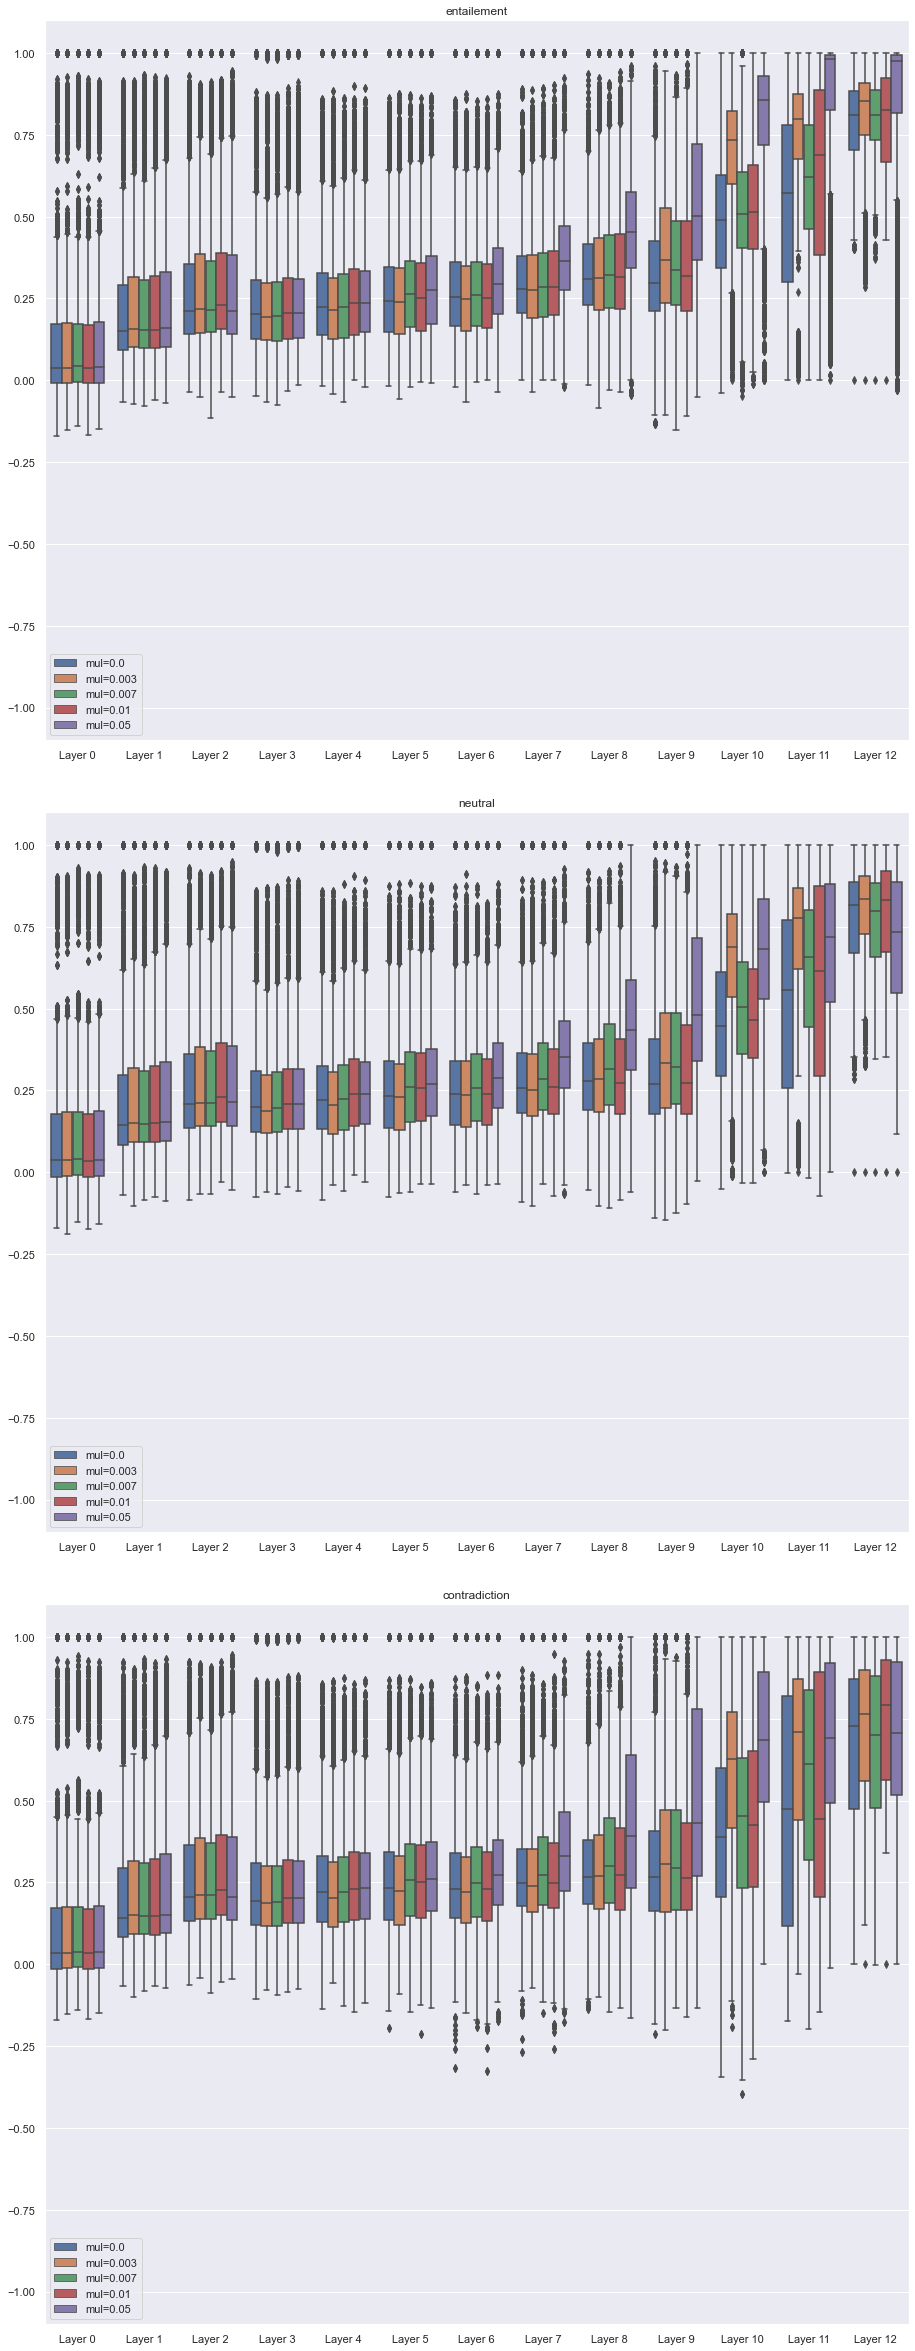

In [27]:
fig